<img src="https://electronaut.info/wp-content/uploads/2017/05/Tubescape_jupyter2.jpg">

<h1><font color = b30000>TUBE DATA MATCHER for uTRACER FILES</font></h1><h5>Anode current for a sweep of grid voltages  when anode voltage = constant</h5>


# STEP 1 — Import and process tube data, build dataframe.

In [129]:
from electronaut_uTracer_Import import *
df.head()

,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,1,5749,325,99.278,65.383,44.717,34.082,26.669,20.931,16.492,12.992,10.291,8.23,6.669,5.495,4.626
1,10,5749,325,84.662,55.752,37.5,27.666,20.873,15.84,12.088,9.304,7.261,5.807,4.747,3.945,3.344
2,100,5749,325,76.506,50.319,33.695,25.027,19.052,14.603,11.283,8.775,6.954,5.655,4.765,4.118,3.619
3,102,5749,325,92.106,59.906,39.752,29.517,22.626,17.543,13.745,10.894,8.787,7.228,6.08,5.204,4.575
4,103,5749,325,69.639,45.449,30.772,22.843,17.624,13.782,10.864,8.615,6.916,5.657,4.754,4.092,3.619


In [130]:
len(df)

167

In [126]:
# NOT WORKING

from bokeh.plotting import figure, output_file, show

output_file("TubeDataSet_Range.html")

p = figure(plot_width=800, plot_height=600)
p.outline_line_width = 5
p.outline_line_alpha = 0.5
p.outline_line_color = "red"

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

all_x_values, all_y_values, total = [], [], []

# for i in list(df.index[0:5]):
#     y_values = list((df.iloc[(int(temp_tube))]))[3:]
    
#     all_x_values.append(x_values)
#     all_y_values.append(y_values)
  
all_x_values = [[3,2,1],[3,5,6]]    
all_y_values = [[9,8,7],[6,5,4]]    


print("X", all_x_values)
print("Y", all_y_values)

      
      
p.multi_line(all_x_values, all_y_values,
                 color=["firebrick", "navy"], alpha=[0.8, 0.3], line_width=1)
    
    
    
# p.line(all_x_values, all_y_values, line_width=1)    
    

show(p)

X [[3, 2, 1], [3, 5, 6]]
Y [[9, 8, 7], [6, 5, 4]]


##### TODO:  INSERT PLOT OF ALL TUBES


# STEP 3: Show the statistics of the tube data set

In [3]:
# For some reason, .describe is requiring the .astype(float) in order to show the stats.
df_stats = df.astype(float).describe()
df_stats.loc[:, 'tube_type'] = df_stats.loc[:, 'tube_type'].astype(int)
df_stats.loc[:, 'tube_ID'] = df_stats.loc[:, 'tube_ID'].astype(int)
# df_stats.loc[:, 'tube_ID'] = df_stats.loc[:, 'tube_ID'].astype(str)
df_stats

,tube_ID,tube_type,anode_voltage,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
count,167,167,167.0,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,94,5749,325.0,85.854024,54.600138,35.936389,26.606778,20.321790,15.648988,12.173521,9.577371,7.657347,6.248994,5.208695,4.410192,3.798886
std,57,0,0.0,10.252616,5.708263,3.792364,2.876220,2.387349,2.053135,1.794487,1.576286,1.382130,1.206177,1.052825,0.929768,0.840940
min,1,5749,325.0,48.494000,30.962000,19.730000,14.837000,11.473000,8.866000,6.827000,5.260000,4.091000,3.235000,2.613000,2.153000,1.833000
25%,43,5749,325.0,80.143500,51.841500,34.041500,25.167500,19.052000,14.428000,11.082500,8.645000,6.855500,5.501500,4.584500,3.869500,3.319500
50%,94,5749,325.0,87.154000,55.362000,36.408000,26.777000,20.534000,15.759000,12.180000,9.602000,7.679000,6.162000,5.096000,4.343000,3.712000
75%,143,5749,325.0,91.902000,58.625500,38.192000,28.252000,21.554500,16.662500,13.070000,10.400000,8.427000,6.923000,5.801500,4.957500,4.302500
max,196,5749,325.0,107.892000,65.654000,46.996000,36.666000,30.080000,25.292000,21.460000,18.384000,15.898000,13.867000,12.198000,10.760000,9.616000


In [157]:
from bokeh.plotting import figure, output_file, show

output_file("Tube_Batch_Statistics.html")

p = figure(plot_width=800, plot_height=600)

temp_columns = list(df_stats.columns)
stats_columns = []

# Make a list for the x_values by chopping off all the "bias_" column name prefixes and converting to ints
x_values = [int(i[5:]) for i in temp_columns if i.startswith('Bias_') == True]        

# Make a list of the min values and plot
y_min = list(df_stats.loc['min'])
y_min = y_min[3:]
p.line(x_values, y_min, line_width=2)

# Make a list of the max values and plot
y_max = list(df_stats.loc['max'])
y_max = y_max[3:]
p.line(x_values, y_max, line_width=2)

# Make a list of the mean values and plot
y_mean = list(df_stats.loc['mean'])
y_mean = y_mean[3:]
p.line(x_values, y_mean, line_width=2)
show(p)

In [72]:
p.multi_line([x_values, x_values, x_values], [y_min, y_max, y_mean],
             color=["firebrick", "navy"], alpha=[0.8, 0.3, 0.5], line_width=4)

show(p)

/Users/rrmc/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/Users/rrmc/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


##### TODO:  INSERT PLOT(S) OF STATISTICS 

# STEP 4: Calculate the differences between all tubes

In [6]:
from ipywidgets import FloatProgress
from IPython.display import display
import time

start_time = time.time() 

def build_difference_df(df, df_stats):
    
    # Display a progress bar
    build_diff_progress_bar = FloatProgress(min=0, max=100)
    display(build_diff_progress_bar)
       
    # Make a list of all the columns in the dataframe
    cols = list(df.columns)
    
    # Make a list of just the bias columns
    bias_list = []
    for i in cols:
        if i.startswith('Bias_') == True:
            bias_list.append(i)
    
    # BMake an empty list to hold the calculated values, to be used to build the difference dataframe
    diff_squared_list = []
    
    # Iterate through the index of tubes in the master dataframe to select a reference tube
    for each_ref_tube in df.index:
        
        # Get the next reference tube data, as a series
        ref_tube = df.iloc[each_ref_tube]
        ref_tube_ID = ref_tube.tube_ID

        # Iterate through the index of tubes in the master dataframe to select a match tube
        for each_match_tube in df.index:
            
            # Get the next tube data to be compared, as a series
            match_tube = df.iloc[each_match_tube]
            match_tube_ID = match_tube.tube_ID
            
            # Dictionary container to hold the difference variables for each tube
            temp_dict = {}
            
            # Compute the squares of the differences in each current measurement
            error_sum = 0
            for bias in enumerate(bias_list):
                mismatch = ((float(match_tube.loc[bias[1]]) - float(ref_tube.loc[bias[1]]))**2)
                temp_dict[bias[1]] = mismatch
                error_sum = error_sum + mismatch

            # Add other relevant key/value pairs to the dictionary  
            temp_dict['ref_tube_ID'] = ref_tube_ID
            temp_dict['match_tube_ID'] = match_tube_ID
            temp_dict['error_sum'] = error_sum

            # Append the tube's calculated values to the diff_squared_list
            diff_squared_list.append(temp_dict)
            
            # Update the progress bar
            build_diff_progress_bar.value += 1

    
    # Make an ordered list for the columns of the new difference dataframe
    new_cols_to_add = ['ref_tube_ID', 'match_tube_ID', 'error_sum']
    df_dif_cols = new_cols_to_add + bias_list
    df_dif = pd.DataFrame(diff_squared_list, columns = df_dif_cols)

    return df_dif
    
    
df_dif = build_difference_df(df, df_stats)

# Produce a brief report:
total_rows = len(df_dif)
total_columns = len(df_dif.columns)
total_datapoints = total_rows * total_columns
stop_time = time.time()
elapsed_time = stop_time - start_time
print("It took", round(elapsed_time, 2), "seconds to calculate", 
      total_datapoints, "values, resulting in", len(df_dif), "rows.")

# Display the head of the difference dataframe
df_dif.head()

It took 23.64 seconds to calculate 446224 values, resulting in 27889 rows.


,ref_tube_ID,match_tube_ID,error_sum,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,10,514.934156,213.627456,92.756161,52.085089,41.165056,33.593616,25.918281,19.395216,13.601344,9.180900,5.870929,3.694084,2.402500,1.643524
2,1,100,1116.246220,518.563984,226.924096,121.484484,81.993025,58.018689,40.043584,27.133681,17.783089,11.135569,6.630625,3.625216,1.896129,1.014049
3,1,102,170.397792,51.437584,29.997529,24.651225,20.839225,16.345849,11.478544,7.546009,4.401604,2.262016,1.004004,0.346921,0.084681,0.002601
4,1,103,1805.026199,878.470321,397.364356,194.463025,126.315121,81.812025,51.108201,31.674384,19.158129,11.390625,6.620329,3.667225,1.968409,1.014049


In [ ]:
len(df_dif.columns)

# Find the best matches for a particular tube_ID

In [ ]:
def find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size):
    tube_to_match = str(tube_to_match)
    
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif[(df_dif.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(tube_set_size)
    
    return df_tube_set

tube_to_match = 13
tube_set_size = 8
df_tube_set = find_best_set_for_chosen_tube_ID(tube_to_match, tube_set_size)
df_tube_set.head(tube_set_size)


In [ ]:
tube_set_score = df_tube_set.error_sum.sum()
tube_set_score

# STEP 5:  Build a dataframe of the best matched sets in order

In [134]:
# math lib used for generating ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
import math


# Make a local version of df_dif that can be butchered
df_dif_copy = df_dif.copy()
print("Total possibilities:", len(df_dif_copy))


def ask_tube_set_size():
    
    # Ask the user to enter the set size
    tube_set_size = input("Please enter the number of tubes per matched set:")
    
    # Build a list of tube names for the tube set size
    tube_sets_columns = ['Tube_' + str(1 + i) for i in range(int(tube_set_size))]    
    
    return tube_set_size, tube_sets_columns 


def find_best_set_for_chosen_tube_ID(df_dif_copy, tube_to_match, tube_set_size, tube_sets_columns):
    tube_to_match = str(tube_to_match)
        
    # Create a new dataframe showing only tube_set_size number of nearest matches to the chosen tube_to_match
    df_tube_set = df_dif_copy[(df_dif_copy.ref_tube_ID == tube_to_match)].sort_values('error_sum').head(int(tube_set_size))
        
    # Create the dictionary of the tubes in the set and the total score of the set
    tube_set_list = list(df_tube_set.match_tube_ID)
    tube_set_dict = dict(zip(tube_sets_columns, tube_set_list))   
    tube_set_score = df_tube_set.error_sum.sum()
    tube_set_dict.update({'tube_set_score':tube_set_score})

    return tube_set_dict


def find_best_set(df_dif_copy, tube_set_size, tube_sets_columns):
    
    # Make an empty list to hold the tube sets and their scores
    tube_sets_and_scores_list = []
    temp_dict = {}
    
    if 'tube_set_score' in tube_sets_columns:
        tube_sets_columns.remove('tube_set_score')

    for i in df_dif_copy.ref_tube_ID.unique():
        temp_dict = find_best_set_for_chosen_tube_ID(df_dif_copy, i, tube_set_size, tube_sets_columns)
        tube_sets_and_scores_list.append(temp_dict)

    # Add 'tube_set_score' column name at the front of the list
    if 'tube_set_score' not in tube_sets_columns: 
        tube_sets_columns.insert(0, 'tube_set_score')    
    
    # Create a dataframe for the tube sets called df_tube_sets 
    df_tube_sets = pd.DataFrame(tube_sets_and_scores_list, columns=tube_sets_columns)
    
    # Sort the tube_set_score column, take the top row (with the lowest score) as a new df 
    df_best_set_temp = df_tube_sets.sort_values('tube_set_score').head(1)
        
    return df_best_set_temp
   
# Start a timer
start_time = time.time()   
    
# Make an empty dataframe to hold all the sets and their scores
df_best_tube_sets = pd.DataFrame()

# Get the tube_set_size and the tube_sets_columns from the ask_tube_set_size function
tube_set_size, tube_sets_columns = ask_tube_set_size()

# Get the best tube set from the batch
df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns) 

# Display a progress bar
progress_bar_range = int(len(df)/int(tube_set_size))
best_matched_progress_bar = FloatProgress(min=0, max=progress_bar_range)
display(best_matched_progress_bar)

# Append the best tube set to the df_best_tube_sets dataframe
df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

# Remove the best tube set from df_dif_copy
tube_delete_list = list(df_best_set_temp.iloc[0])
tube_delete_list.pop(0)
df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]

# A function to generate ordinal strings; i.e. ['1st', '2nd', '3rd'] etc.
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])
ordinal_list = [ordinal(n) for n in range(1, int(len(df)))]

set_count = 1
print()
print("*** BEST! ***")
print(ordinal_list[0],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
print("TUBES:", tube_delete_list)

# Update the progress bar
best_matched_progress_bar.value += 1


while len(df_dif_copy.ref_tube_ID.unique()) >= int(tube_set_size):
    # Get all the rest of the sets from the batch
    df_best_set_temp = find_best_set(df_dif_copy, tube_set_size, tube_sets_columns)
    
    # Append the best tube set to the df_best_tube_sets dataframe
    df_best_tube_sets = df_best_tube_sets.append(df_best_set_temp)

    # Remove the best tube set from df_dif_copy
    tube_delete_list = list(df_best_set_temp.iloc[0])
    tube_delete_list.pop(0)

    df_dif_copy = df_dif_copy[~df_dif_copy.ref_tube_ID.isin(tube_delete_list)]
    df_dif_copy = df_dif_copy[~df_dif_copy.match_tube_ID.isin(tube_delete_list)]
    print()
    print(ordinal_list[set_count],"best tube set SCORE:", str(df_best_set_temp.tube_set_score.iloc[0]))
    print("TUBES:", tube_delete_list)

    set_count += 1
    
    # Update the progress bar
    best_matched_progress_bar.value += 1


stop_time = time.time()
elapsed_time = stop_time - start_time
print()
print("It took", round(elapsed_time, 2), "seconds to produce", set_count, "tube sets.")

Total possibilities: 27889
Please enter the number of tubes per matched set:8



*** BEST! ***
1st best tube set SCORE: 11.73209
TUBES: ['32', '17', '5', '123', '14', '15', '117', '194']

2nd best tube set SCORE: 12.110799
TUBES: ['84', '89', '118', '122', '70', '26', '66', '125']

3rd best tube set SCORE: 13.085314
TUBES: ['196', '64', '94', '149', '109', '38', '82', '104']

4th best tube set SCORE: 14.665835
TUBES: ['132', '142', '192', '143', '2', '102', '43', '113']

5th best tube set SCORE: 20.19433
TUBES: ['18', '140', '53', '4', '21', '95', '24', '130']

6th best tube set SCORE: 21.743068
TUBES: ['30', '47', '72', '111', '10', '79', '135', '49']

7th best tube set SCORE: 23.647196
TUBES: ['90', '65', '81', '116', '34', '67', '76', '124']

8th best tube set SCORE: 25.198372
TUBES: ['115', '120', '144', '126', '107', '137', '190', '68']

9th best tube set SCORE: 26.695196
TUBES: ['100', '98', '86', '150', '141', '92', '71', '106']

10th best tube set SCORE: 28.321107
TUBES: ['174', '154', '180', '167', '161', '184', '182', '170']

11th best tube set SCORE: 28

In [150]:
df_best_tube_sets.sort_values('tube_set_score').head()

,tube_set_score,Tube_1,Tube_2,Tube_3,Tube_4,Tube_5,Tube_6,Tube_7,Tube_8
103,11.732090,32,17,5,123,14,15,117,194
144,12.110799,84,89,118,122,70,26,66,125
79,13.085314,196,64,94,149,109,38,82,104
23,14.665835,132,142,192,143,2,102,43,113
59,20.194330,18,140,53,4,21,95,24,130


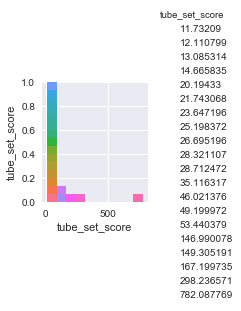

In [151]:
import seaborn as sns
sns.set()

df_sns = df_best_tube_sets[['tube_set_score']].copy()

sns.pairplot(df_sns, 'tube_set_score')
sns.plt.show()


In [153]:
from bokeh.charts import Histogram, output_file, show

p = Histogram(df_best_tube_sets['tube_set_score'], title="Tube Set Scores")

output_file("histogram.html",)

p

Chart(id='86ffd19e-fe5c-4b78-879d-cecd97d71fd5', ...)

,ref_tube_ID,match_tube_ID,error_sum,Bias_2,Bias_6,Bias_10,Bias_14,Bias_18,Bias_22,Bias_26,Bias_30,Bias_34,Bias_38,Bias_42,Bias_46,Bias_50
0,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,10,514.934156,213.627456,92.756161,52.085089,41.165056,33.593616,25.918281,19.395216,13.601344,9.180900,5.870929,3.694084,2.402500,1.643524
2,1,100,1116.246220,518.563984,226.924096,121.484484,81.993025,58.018689,40.043584,27.133681,17.783089,11.135569,6.630625,3.625216,1.896129,1.014049
3,1,102,170.397792,51.437584,29.997529,24.651225,20.839225,16.345849,11.478544,7.546009,4.401604,2.262016,1.004004,0.346921,0.084681,0.002601
4,1,103,1805.026199,878.470321,397.364356,194.463025,126.315121,81.812025,51.108201,31.674384,19.158129,11.390625,6.620329,3.667225,1.968409,1.014049
5,1,104,223.898301,55.413136,44.635761,35.307364,28.783225,21.846276,15.397776,10.118761,6.056521,3.378244,1.713481,0.799236,0.320356,0.128164
6,1,106,966.118133,418.857156,199.402641,114.982729,77.334436,54.464400,38.440000,26.224641,16.785409,10.036224,5.410276,2.544025,1.132096,0.504100
7,1,107,540.307911,288.660100,108.388921,52.186176,34.105600,23.619600,15.186609,9.174841,4.995225,2.537649,1.079521,0.327184,0.040401,0.006084
8,1,108,1893.095408,936.727236,400.080004,194.853681,123.343236,85.285225,58.430736,39.150049,24.750625,14.768649,8.162449,4.206601,2.172676,1.164241
9,1,109,253.680243,58.216900,51.208336,41.434969,34.421689,26.368225,18.232900,11.621281,6.584356,3.385600,1.510441,0.524176,0.142129,0.029241


# Miscellaneous exeriments with ipywidgets

In [ ]:
import ipywidgets as wg
from ipywidgets import Layout, Box
from IPython.display import display


# Make a list of all the tube_ID names, then build a select box with those values
tube_list = list(df.loc[:, 'tube_ID'])
tube_list.sort(key=int)
tube_ID_select_box = wg.Select(options=tube_list, value=tube_list[0], description='Reference Tube', layout=Layout(width='150px'), disabled=False)

# Make a list of the tubes for the "Matched Tubes" selectMultiple box
matched_list = ['1', '33', '67', '22', '45']
matched_tube_box = wg.SelectMultiple(options=matched_list, layout=Layout(display="flex", flex_flow='column', width='350px'), description="Matched Tubes") 


items = [tube_ID_select_box, matched_tube_box]

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='solid',
                    width='100%')
box = Box(children=items, layout=box_layout)

box


# def respond(sender):
    # pass the chosen Tube_ID to a function that looks up the resulting match list, then fill the match list box
    
    
# display(tube_ID_select_box,matched_tube_box)
# tube_ID_select_box.observe(respond)

# Other Miscellaneous stuff

##### Apply a function to a column
df.Bias_2.max()

In [ ]:
# Applymap is useful for applying a function to all data
# For example, converting all data from floats to ints
# df.loc[2:7, 'Bias_2': 'Bias_50'].applymap(int)

In [ ]:
# List all available magics
% lsmagic

In [ ]:
# Display environmental variables
env_variables = %env
current_path = env_variables.get('PATH')
current_path

In [ ]:
mydict = % env
mydict.keys()

In [ ]:
% env

In [ ]:
# % time x = range(10000)
% timeit x = range(10000)
max(x)